In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random 
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

C:\Users\Dennis\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Dennis\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Dennis\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Dennis\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available", len(physical_devices))

Num GPUs Available 1


In [3]:
os.chdir('C:/Users/Dennis/Documents/GitHub/wwi17seb-ml-image-filter/Filter_Images')
if os.path.isdir('train') is False: 
    os.makedirs('train')
    os.makedirs('test')
    os.makedirs('valid')

if os.path.isdir('train/1977') is False: 
    os.makedirs('train/1977')
    os.makedirs('valid/1977')
    os.makedirs('test/1977')

    os.chdir('1977')
    for c in random.sample(glob.glob('*'), 200): 
        shutil.move(c, '../train/1977' )
    for c in random.sample(glob.glob('*'), 25): 
        shutil.move(c, '../valid/1977' )
    for c in random.sample(glob.glob('*'), 25): 
        shutil.move(c, '../test/1977' )
        
    os.chdir('../')

if os.path.isdir('train/Amaro') is False: 
    os.makedirs('train/Amaro')
    os.makedirs('valid/Amaro')
    os.makedirs('test/Amaro')

    os.chdir('Amaro')
    for c in random.sample(glob.glob('*'), 200): 
        shutil.move(c, '../train/Amaro' )
    for c in random.sample(glob.glob('*'), 25): 
        shutil.move(c, '../valid/Amaro' )
    for c in random.sample(glob.glob('*'), 25): 
        shutil.move(c, '../test/Amaro' )
        

    os.chdir('../')
    
if os.path.isdir('train/Apollo') is False: 
    os.makedirs('train/Apollo')
    os.makedirs('valid/Apollo')
    os.makedirs('test/Apollo')

    os.chdir('Apollo')
    for c in random.sample(glob.glob('*'), 200): 
        shutil.move(c, '../train/Apollo' )
    for c in random.sample(glob.glob('*'), 25): 
        shutil.move(c, '../valid/Apollo' )
    for c in random.sample(glob.glob('*'), 25): 
        shutil.move(c, '../test/Apollo' )
        

    os.chdir('../')
    
if os.path.isdir('train/Brannan') is False: 
    os.makedirs('train/Brannan')
    os.makedirs('valid/Brannan')
    os.makedirs('test/Brannan')

    os.chdir('Brannan')
    for c in random.sample(glob.glob('*'), 200): 
        shutil.move(c, '../train/Brannan' )
    for c in random.sample(glob.glob('*'), 25): 
        shutil.move(c, '../valid/Brannan' )
    for c in random.sample(glob.glob('*'), 25): 
        shutil.move(c, '../test/Brannan' )
        

    os.chdir('../')
    
if os.path.isdir('train/Earlybird') is False: 
    os.makedirs('train/Earlybird')
    os.makedirs('valid/Earlybird')
    os.makedirs('test/Earlybird')

    os.chdir('Earlybird')
    for c in random.sample(glob.glob('*'), 200): 
        shutil.move(c, '../train/Earlybird' )
    for c in random.sample(glob.glob('*'), 25): 
        shutil.move(c, '../valid/Earlybird' )
    for c in random.sample(glob.glob('*'), 25): 
        shutil.move(c, '../test/Earlybird' )
        

    os.chdir('../../')   
        

In [4]:
os.chdir('C:/Users/Dennis/Documents/GitHub/wwi17seb-ml-image-filter')
train_path = 'Filter_Images/train'
valid_path = 'Filter_Images/valid'
test_path = 'Filter_Images/test'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['1977', 'Amaro', 'Apollo'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['1977', 'Amaro', 'Apollo'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['1977', 'Amaro', 'Apollo'], batch_size=10, shuffle=False)

Found 609 images belonging to 3 classes.
Found 75 images belonging to 3 classes.
Found 75 images belonging to 3 classes.


In [6]:
imgs, labels = next(train_batches)

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

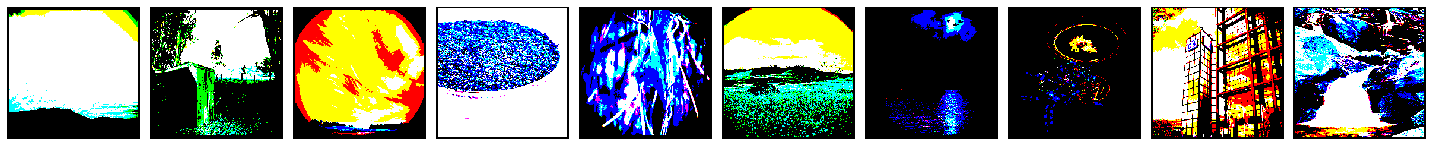

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [8]:
plotImages(imgs)
print(labels)

In [13]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224,224,3)), 
    MaxPool2D(pool_size=(2, 2), strides=2), 
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'), 
    MaxPool2D(pool_size=(2,2), strides=2), 
    Flatten(), 
    Dense(units=3, activation='softmax'),
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 602115    
Total params: 621,507
Trainable params: 621,507
Non-trainable params: 0
________________________________________________

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
61/61 - 11s - loss: 26.9267 - acc: 0.6601 - val_loss: 13.2043 - val_acc: 0.6933
Epoch 2/10
61/61 - 9s - loss: 3.4607 - acc: 0.8982 - val_loss: 5.5768 - val_acc: 0.8400
Epoch 3/10
61/61 - 9s - loss: 0.9920 - acc: 0.9655 - val_loss: 4.7855 - val_acc: 0.8267
Epoch 4/10
61/61 - 9s - loss: 0.5626 - acc: 0.9721 - val_loss: 5.1689 - val_acc: 0.8800
Epoch 5/10
61/61 - 9s - loss: 0.4541 - acc: 0.9737 - val_loss: 7.1719 - val_acc: 0.8267
Epoch 6/10
61/61 - 9s - loss: 0.8807 - acc: 0.9557 - val_loss: 10.6918 - val_acc: 0.7733
Epoch 7/10
61/61 - 9s - loss: 0.4727 - acc: 0.9655 - val_loss: 3.5914 - val_acc: 0.8667
Epoch 8/10
61/61 - 9s - loss: 0.7290 - acc: 0.9557 - val_loss: 5.7260 - val_acc: 0.8400
Epoch 9/10
61/61 - 9s - loss: 0.5461 - acc: 0.9803 - val_loss: 4.9532 - val_acc: 0.8400
Epoch 10/10
61/61 - 9s - loss: 4.3211e-04 - acc: 1.0000 - val_loss: 4.9389 - val_acc: 0.8400
